In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread
import geopandas as gpd
import pandas as pd

%matplotlib inline 

In [11]:
# Dim = imread('..\..\..\data\2017\ng\ng6902_rgb_250_04.jpg')
im = imread('../../../data/digimap_aerial/tf0502_rgb_250_05.jpg')

In [12]:
from skimage.transform import resize

small_im = resize(im, (2000, 2000))

/home/laurence/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/laurence/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


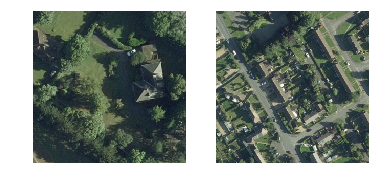

In [30]:
orig = (np.random.randint(0, 3500), np.random.randint(0, 3500))

f, axe = plt.subplots(1, 2) 

axe[0].imshow(im[orig[0]:orig[0]+299,orig[1]:orig[1]+299])

orig_s = (np.random.randint(0, 1500), np.random.randint(0, 1500))

axe[1].imshow(small_im[orig_s[0]:orig_s[0]+299,orig_s[1]:orig_s[1]+299])

for ax in axe: 
    ax.set_axis_off()

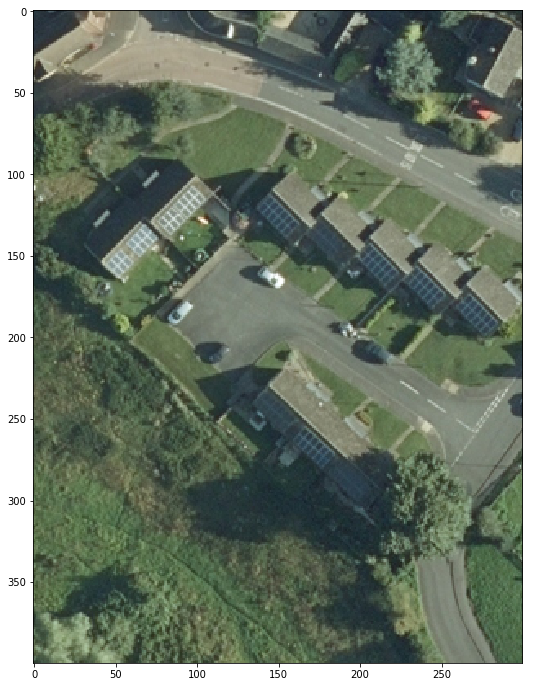

In [14]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(im[2200:2600, 800:1100])

TODO  
Downsize everything by 2.  
Make hand-sorted training set of 100 PV images and 100 no PV  
Use imgaug for satellite/overhead specific augmentations

In [31]:
osm = gpd.read_file('data/OSM_UK_solar.geojson')

In [32]:
osm.head(1)

,id,@id,addr:city,addr:flats,addr:housename,addr:postcode,addr:street,amenity,building,building:levels,...,source:geometry,survey_date,latest_start_date,plant:type,pv_module_array,height,roof:levels,generator:output:biogas,orientation,geometry
0,way/28941323,way/28941323,Bexhill,1-7,Richmond,TN39 3RJ,Collington Lane East,social_facility,residential,2,...,None,None,None,None,None,None,None,None,None,"POLYGON ((0.4542911 50.8460332, 0.4542938 50.8..."


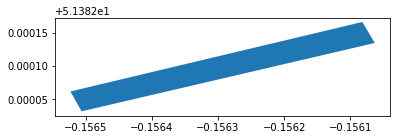

In [33]:
osm.iloc[10:11].plot()

In [8]:
# Column for areas of ways in OSM solar geojson
# To proxy capacity
# Then plot histogram
# list(osm.columns)
#  'id', '@id', 'addr:city', 'addr:flats', 'addr:housename', 'addr:postcode', 'addr:street', 'amenity', 'building', 
# 'building:levels', 'capacity', 'contact:phone', 'contact:website', 'fhrs:id', 'generator:location', 
# 'generator:method', 'generator:source', 'generator:type', 'name', 'operator', 'power', 'social_facility', 
# 'social_facility:for', 'source:addr', 'source:addr:housename', 'wikimedia_commons', 'generator:output:electricity', 
# 'tourism', 'flickr', 'addr:housenumber', 'location', 'source', 'note', 'denomination', 'heritage', 'heritage:operator', 
# 'listed_status', 'phone', 'religion', 'url', 'wikidata', 'wikipedia', 'shop', 'description', 'layer', 'addr:place', 
# 'ref:edubase', 'landuse', 'source:power', 'source:addr:postcode', 'barrier', 'wheelchair', 'website', 'addr:country', 
# 'note:generator:output:electricity', 'area', 'generator:estimated_output:electricity', 'repd:id', 'power_source', 
# 'generator:output', 'addr:suburb', 'source:postcode', 'generator:place', 'source:generator:output:electricity', 
# 'addr:village', 'source:name', 'proposed:power', 'proposed', 'frequency', 'voltage', 'owner', 'start_date', 'fixme', 
# 'plant:method', 'plant:source', 'leisure', 'sport', 'opening_hours', 'HE_ref', 'architect', 'building:architecture', 
# 'geograph:id', 'source:output', 'fence', 'plant:output:electricity', 'construction', 'source:1', 'source:2', 'manufacturer', 
# 'note_2', 'area_1', 'floating', 'ref', 'ref:REPD', 'source:outline', 'survey:date', 'generator:plant', 'generator:output:hot_water', 
# 'level', 'roof:material', 'roof:orientation', 'roof:shape', 'man_made', 'type', 'generator:orientation', 'generator:solar:modules', 
# 'notional_area', 'notional_capacity', 'source:geometry', 'survey_date', 'latest_start_date', 'plant:type', 'pv_module_array', 
# 'height', 'roof:levels', 'generator:output:biogas', 'orientation', 'geometry'

In [8]:
len(osm)

9511

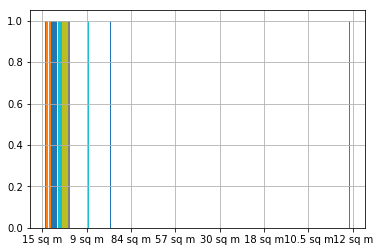

In [9]:
osm['notional_area'].hist()

In [10]:
osm.crs

{'init': 'epsg:4326'}

In [11]:
# Infer area of plot
osm['area'] = osm['geometry'].area

In [12]:
# Convert to Cartesian system (EPSG:3857, unit= m)              
osm2 = osm.copy()
osm2 = osm2.to_crs({'init': 'epsg:3857'})
osm2["area"] = osm2['geometry'].area

Text(0.5, 1.0, 'OSM Arrays all')

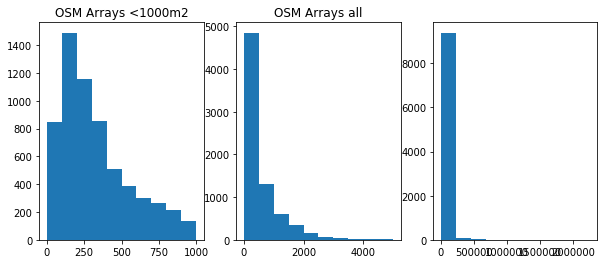

In [13]:
f, ax = plt.subplots(1, 3, figsize=(10,4)) 
ax[0].hist(osm2[osm2['area'] < 1000]['area'])
ax[1].hist(osm2[osm2['area'] < 5000]['area'])
ax[2].hist(osm2['area'])
ax[0].set_title('OSM Arrays <1000m2')
ax[1].set_title('OSM Arrays <5000m2')
ax[1].set_title('OSM Arrays all')

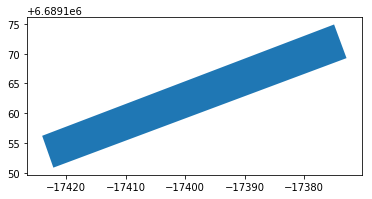

In [14]:
osm2.iloc[10:11].plot()

In [86]:
# 1 panel is approx 1m * 1.65m
# and about 300W
# So about 300/1.65 = 181.82 W/m2
# 200*181.82 = 36364 is 36kW so fairly big average installation
# 5000*181 = 905,000 ie ~ 1MW

In [18]:
osm2.groupby(osm2['geometry'].type).count()

,id,@id,addr:city,addr:flats,addr:housename,addr:postcode,addr:street,amenity,building,building:levels,...,source:geometry,survey_date,latest_start_date,plant:type,pv_module_array,height,roof:levels,generator:output:biogas,orientation,geometry
LineString,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Polygon,9508,9508,601,1,26,586,718,17,3225,227,...,4,1,4,1,1,1,1,1,2,9508


a 4kW array is around 29m2  
ie around 1kW per 7.5m2

In [21]:
osm2['size'] = osm2['area']/7.5

(array([ 44.,  94.,  75., 478.,  65.,  56.,  51., 119., 261., 309.]),
 array([ 0.        ,  1.99850236,  3.99700471,  5.99550707,  7.99400943,
         9.99251178, 11.99101414, 13.9895165 , 15.98801885, 17.98652121,
        19.98502357]),
 <a list of 10 Patch objects>)

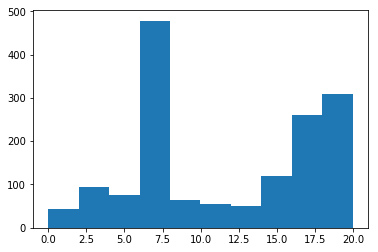

In [25]:
plt.hist(osm2[osm2['size']<20]['size'])

Seems more likely this spike is the 4kw cutoff

In [27]:
osm2[osm2['size']<50].count()

id                              4103
@id                             4103
addr:city                        525
addr:flats                         0
addr:housename                    13
addr:postcode                    509
addr:street                      603
amenity                            0
building                        2613
building:levels                  173
capacity                           0
contact:phone                      0
contact:website                    0
fhrs:id                            0
generator:location               633
generator:method                4050
generator:source                4103
generator:type                  3986
name                               5
operator                         393
power                           4073
social_facility                    0
social_facility:for                0
source:addr                        0
source:addr:housename              3
wikimedia_commons                  2
generator:output:electricity    3779
t